## detecting fraudulent transactions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
tran_details = pd.read_csv('cust_transaction_details.csv')
customer_details = pd.read_csv('Customer_DF.csv')

## Analysing The Data

In [3]:
tran_details.head()

,Unnamed: 0,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,1,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,3,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,4,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled


In [4]:
customer_details.head()

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
1,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
2,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False
3,3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False
4,4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True


In [5]:
tran_details.shape

(623, 11)

In [6]:
tran_details.columns

Index(['Unnamed: 0', 'customerEmail', 'transactionId', 'orderId',
       'paymentMethodId', 'paymentMethodRegistrationFailure',
       'paymentMethodType', 'paymentMethodProvider', 'transactionAmount',
       'transactionFailed', 'orderState'],
      dtype='object')

In [7]:
customer_details.shape

(168, 10)

In [8]:
customer_details.columns

Index(['Unnamed: 0', 'customerEmail', 'customerPhone', 'customerDevice',
       'customerIPAddress', 'customerBillingAddress', 'No_Transactions',
       'No_Orders', 'No_Payments', 'Fraud'],
      dtype='object')

In [9]:
tran_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Unnamed: 0                        623 non-null    int64 
 1   customerEmail                     623 non-null    object
 2   transactionId                     623 non-null    object
 3   orderId                           623 non-null    object
 4   paymentMethodId                   623 non-null    object
 5   paymentMethodRegistrationFailure  623 non-null    int64 
 6   paymentMethodType                 623 non-null    object
 7   paymentMethodProvider             623 non-null    object
 8   transactionAmount                 623 non-null    int64 
 9   transactionFailed                 623 non-null    int64 
 10  orderState                        623 non-null    object
dtypes: int64(4), object(7)
memory usage: 53.7+ KB


In [10]:
customer_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              168 non-null    int64 
 1   customerEmail           168 non-null    object
 2   customerPhone           168 non-null    object
 3   customerDevice          168 non-null    object
 4   customerIPAddress       168 non-null    object
 5   customerBillingAddress  168 non-null    object
 6   No_Transactions         168 non-null    int64 
 7   No_Orders               168 non-null    int64 
 8   No_Payments             168 non-null    int64 
 9   Fraud                   168 non-null    bool  
dtypes: bool(1), int64(4), object(5)
memory usage: 12.1+ KB


In [11]:
tran_details.describe()

,Unnamed: 0,paymentMethodRegistrationFailure,transactionAmount,transactionFailed
count,623.000000,623.000000,623.000000,623.000000
mean,311.000000,0.131621,34.598716,0.269663
std,179.988889,0.338350,20.360247,0.444141
min,0.000000,0.000000,10.000000,0.000000
25%,155.500000,0.000000,21.000000,0.000000
50%,311.000000,0.000000,34.000000,0.000000
75%,466.500000,0.000000,45.000000,1.000000
max,622.000000,1.000000,353.000000,1.000000


In [12]:
customer_details.describe()

,Unnamed: 0,No_Transactions,No_Orders,No_Payments
count,168.000000,168.000000,168.000000,168.000000
mean,83.500000,3.708333,2.845238,2.035714
std,48.641546,2.801527,1.981919,2.113240
min,0.000000,0.000000,0.000000,0.000000
25%,41.750000,1.000000,1.000000,1.000000
50%,83.500000,4.000000,3.000000,1.000000
75%,125.250000,5.000000,4.000000,2.000000
max,167.000000,15.000000,8.000000,15.000000


## Data Preprocessing

In [13]:
missing_values_trans = tran_details.isnull().sum()
print(missing_values_trans)

Unnamed: 0                          0
customerEmail                       0
transactionId                       0
orderId                             0
paymentMethodId                     0
paymentMethodRegistrationFailure    0
paymentMethodType                   0
paymentMethodProvider               0
transactionAmount                   0
transactionFailed                   0
orderState                          0
dtype: int64


In [14]:
missing_values_cust = customer_details.isnull().sum()
print(missing_values_cust)

Unnamed: 0                0
customerEmail             0
customerPhone             0
customerDevice            0
customerIPAddress         0
customerBillingAddress    0
No_Transactions           0
No_Orders                 0
No_Payments               0
Fraud                     0
dtype: int64


NO MISSING VALUES FOUND

In [15]:
duplicate_transactions = tran_details[tran_details.duplicated()]
print(duplicate_transactions)

Empty DataFrame
Columns: [Unnamed: 0, customerEmail, transactionId, orderId, paymentMethodId, paymentMethodRegistrationFailure, paymentMethodType, paymentMethodProvider, transactionAmount, transactionFailed, orderState]
Index: []


In [16]:
duplicate_cust_details = customer_details[customer_details.duplicated()]
print(duplicate_cust_details)

Empty DataFrame
Columns: [Unnamed: 0, customerEmail, customerPhone, customerDevice, customerIPAddress, customerBillingAddress, No_Transactions, No_Orders, No_Payments, Fraud]
Index: []


NO DUPLICATES VALUES FOUND

## Feature Engineering

In [17]:
tran_details['paymentMethodRegistrationFailure'].value_counts()

paymentMethodRegistrationFailure
0    541
1     82
Name: count, dtype: int64

In [26]:
tran_details['transactionFailed'].value_counts()

transactionFailed
0    455
1    168
Name: count, dtype: int64

there are so many transactions are failed. 

Let's see which type payment methos is more likely to fail

In [27]:
# tran_details[['paymentMethodRegistrationFailure', 'transactionFailed']]

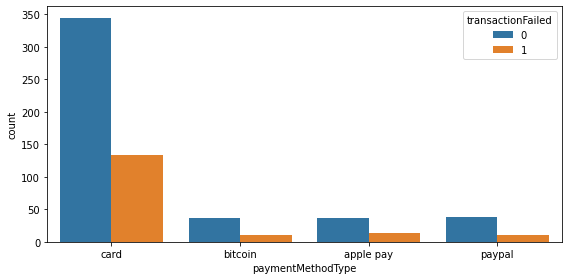

In [28]:
plt.figure(figsize=(8,4))
sns.countplot(x = 'paymentMethodType', hue = 'transactionFailed', data = tran_details)
plt.tight_layout()

maximum payments were made using cards had most transaction failures.

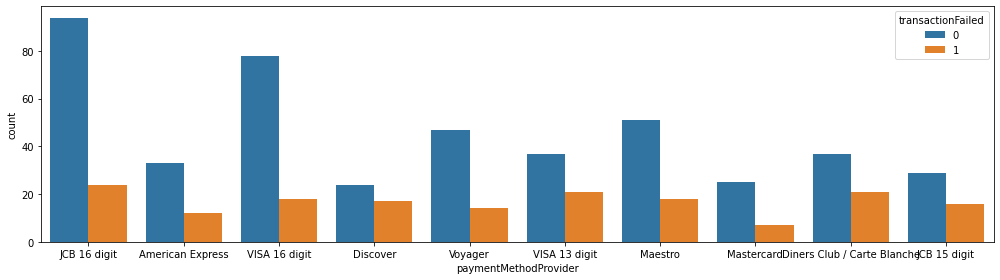

In [30]:
plt.figure(figsize=(14,4))
sns.countplot(x = 'paymentMethodProvider', hue = 'transactionFailed', data = tran_details)
plt.tight_layout()

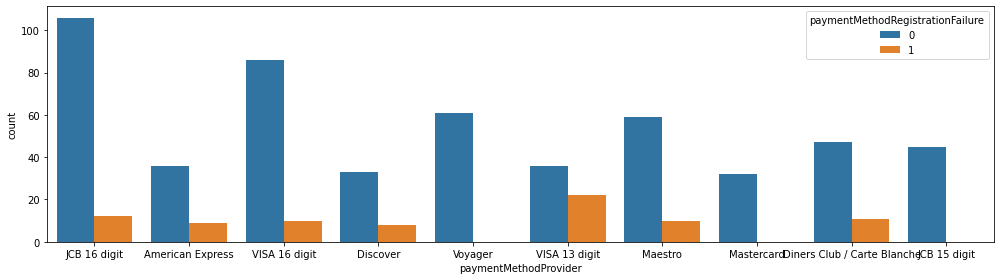

In [33]:
plt.figure(figsize=(14,4))
sns.countplot(x = 'paymentMethodProvider', hue = 'paymentMethodRegistrationFailure', data = tran_details)
plt.tight_layout()

maximum payments were made using 'JCB 16 digit'and 'VISA 16 digit' had most registration failures.

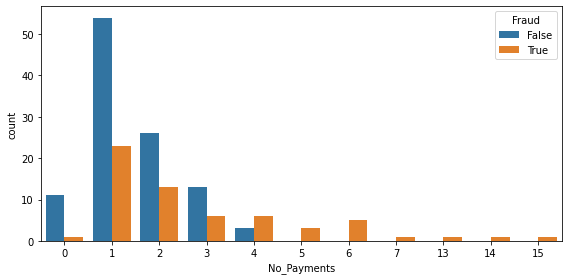

In [36]:
plt.figure(figsize=(8,4))
sns.countplot(x = 'No_Payments', hue = 'Fraud', data = customer_details)
plt.tight_layout()

From this we can see that if the no. of payments is greaten than 5 then the customer is definitely a fraud.